# Final Notebook

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Fire Incidents as a Metrics

WPRDC offers a dataset containing data for fire incidents responded to by the Pittsburgh Bureau of Fire
([https://data.wprdc.org/dataset/fire-incidents-in-city-of-pittsburgh]()). Even though fire is not a "natural disaster", it is an old and fearsome foe of humanity, and once it lights, it's hard to stop due to it's power as a "natural force". By leveraging this dataset, we can determine which neighborhoods have the least amount of fire incidents, making sure we are less vulnerable to fire spreading to our lovely home (because house fires only happen to *other* people).

First we import our libraries and load our dataset.

In [2]:
# Dataset on fire incidents.
fires = pd.read_csv('https://data.wprdc.org/datastore/dump/8d76ac6b-5ae8-4428-82a4-043130d17b02')

Let's take a peek at what we're looking at!

In [3]:
fires.head(5)

,_id,call_no,incident_type,type_description,address,alarms,alarm_time,primary_unit,census_tract,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1,F160029985,111.0,Building fire,"800 BLOCK CENTER ST, WILKINSBURG PA 15221",1,2016-04-21T05:01:04,231EN16,NaN,NaN,NaN,NaN,4.200356e+10,NaN,NaN,NaN,3-16,40.441275,-79.882485
1,2,F180022058,111.0,Building fire,"1100 BLOCK JANE ST, WILKINSBURG PA 15221",1,2018-03-13T08:34:43,231EN16,NaN,NaN,NaN,NaN,4.200356e+10,NaN,NaN,NaN,3-21,40.436342,-79.881003
2,3,F180022102,131.0,Passenger vehicle fire,"SB STATE HWY 28 SB AT 31S, PITTSBURGH PA 15212",0,2018-03-13T11:54:23,231EN32,2406.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-1A,NaN,NaN
3,4,F170043431,131.0,Passenger vehicle fire,"1700 BLOCK BELLEAU DR, PITTSBURGH PA 15212",0,2017-05-31T08:39:47,231EN38,2509.0,Fineview,6.0,25.0,4.200325e+10,1.0,25.0,1.0,1-10,40.460303,-80.006980
4,5,F180021111,111.0,Building fire,"2400 BLOCK VILLAGE RD, PITTSBURGH PA 15205",1,2018-03-09T10:26:42,231EN31,2808.0,Fairywood,2.0,28.0,4.200356e+10,5.0,28.0,6.0,1-16,40.449009,-80.076607


First thing we have to do is clean the data. There are some rows that have no data for the neighborhood column, which is the most important one for us. So, let's get rid of those useless rows.

In [4]:
fires = fires.dropna(subset=['neighborhood'], ignore_index=True)
fires.head(5)

,_id,call_no,incident_type,type_description,address,alarms,alarm_time,primary_unit,census_tract,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,4,F170043431,131.0,Passenger vehicle fire,"1700 BLOCK BELLEAU DR, PITTSBURGH PA 15212",0,2017-05-31T08:39:47,231EN38,2509.0,Fineview,6.0,25.0,4.200325e+10,1.0,25.0,1.0,1-10,40.460303,-80.006980
1,5,F180021111,111.0,Building fire,"2400 BLOCK VILLAGE RD, PITTSBURGH PA 15205",1,2018-03-09T10:26:42,231EN31,2808.0,Fairywood,2.0,28.0,4.200356e+10,5.0,28.0,6.0,1-16,40.449009,-80.076607
2,6,F180021782,150.0,"Outside rubbish fire, Other","S 7TH ST & E CARSON ST, PITTSBURGH PA 15203",0,2018-03-12T09:13:28,231EN24,1702.0,South Side Flats,3.0,17.0,4.200317e+10,4.0,17.0,3.0,4-2,40.428618,-79.992239
3,7,F180022495,113.0,"Cooking fire, confined to container","200 BLOCK E OHIO ST, PITTSBURGH PA 15212",1,2018-03-14T19:46:10,231EN32,2204.0,Allegheny Center,1.0,22.0,4.200356e+10,1.0,22.0,1.0,1-6,40.453022,-80.003660
4,8,F180022546,111.0,Building fire,"7000 BLOCK LEMINGTON AVE, PITTSBURGH PA 15206",1,2018-03-14T23:49:22,231EN15,1203.0,Lincoln-Lemington-Belmar,9.0,12.0,4.200312e+10,2.0,12.0,5.0,3-18,40.471358,-79.898240


Upon looking at other columns, `type_description` seems like it may be of some use. There may be small, contained fires that aren't really a threat to our house. Let's take a look and see what types of fires are listed and reported.

In [5]:
fires.groupby('type_description')['type_description'].count().sort_values(ascending=False)

type_description
Cooking fire, confined to container                   1952
Building fire                                         1822
Passenger vehicle fire                                 918
Outside rubbish, trash or waste fire                   710
Brush or brush-and-grass mixture fire                  517
Outside rubbish fire, Other                            511
Dumpster or other outside trash receptacle fire        415
Trash or rubbish fire, contained                       396
Natural vegetation fire, Other                         247
Special outside fire, Other                            216
Mobile property (vehicle) fire, Other                  173
Fire, Other                                            143
Fires in structure other than in a building            136
Grass fire                                             120
Outside equipment fire                                  67
Fuel burner/boiler malfunction, fire confined           55
Chimney or flue fire, confined to chimn

It does seem that there are some fires we shouldn't really care about, to simplicity, we can just remove all the fires with "confined" in the description.

In [6]:
fires = fires[~fires['type_description'].str.contains('confined')]
fires = fires.reset_index()

Because Pittsburgh is included in the address, lets just make sure that it is included in every address, and we can see that 8 addresses were removed due to not being in Pittsburgh. 

In [7]:
print('Before address removal', len(fires))
fires = fires[fires['address'].str.contains('PITTSBURGH')]
fires = fires.reset_index()
print('After address removal', len(fires))

Before address removal 6589
After address removal 6581


Finally, let's look at the data for fire incidents per neighborhood. We can visualize this as a bar chart of the ten safest neighborhoods.

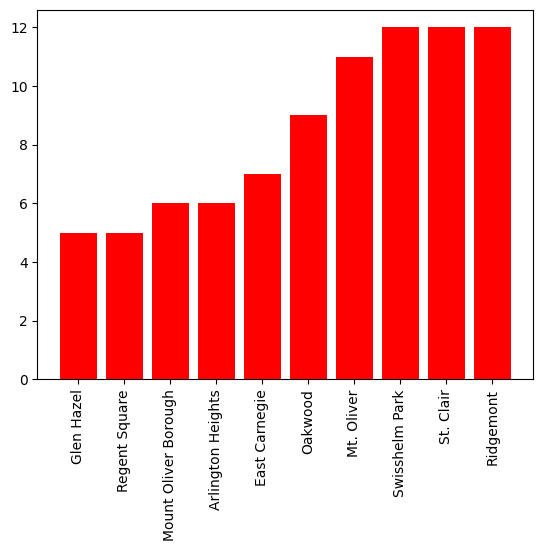

In [8]:
neighborhood_incidents = fires.groupby('neighborhood')['neighborhood'].count().sort_values()
selection = neighborhood_incidents[:10]
plt.bar(selection.index, selection, color='red')
plt.xticks(rotation=90)
plt.show()

We can see here that the safest neighborhoods from fire are
1. Glen Hazel (5)
2. Regent Square (5)
3. Mount Oliver Borough (6)
4. Arlington Heights (6)
5. East Carnegie (7)

## Using speed humps to as a metric 

The Pittsburgh speed hump location dataset can give us information about the amount of speed humps in each neighborhood. This information can be used to figure out which neighborhood is best for avoiding natural disasters. This is because the more speed humps in a area means traffic flows more slowly, thus making it harder to escape natural disasters.  

### Analysis of the speed humps dataset 

We first start by loading the dataset and getting everything set up for data analysis. 

In [157]:
humps = pd.read_csv("https://data.wprdc.org/datastore/dump/37b2ac41-ae8e-4de1-8405-157e05dc3640")

After loading and getting everything set up, let's take a glance at what we're working with 

In [160]:
humps.head(5)

,_id,id,hump_id,locator_address_number,locator_street,pavement,speed_hump_material,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1,430808404,1,4337.0,Saline St,9257,Asphalt,Squirrel Hill South,5,14,42003141400,3,14,4,2-15,40.419835,-79.926062
1,34,1520886592,2,NaN,Summerset Dr,15346,NaN,Squirrel Hill South,5,14,42003141400,3,14,4,2-20,40.425040,-79.912040
2,67,858537521,3,511.0,Gold Way,1755,Asphalt,North Oakland,6,5,42003562000,3,5,4,2-23,40.456746,-79.954521
3,68,297775878,4,547.0,Gold Way,1755,Asphalt,North Oakland,6,5,42003562000,3,5,4,2-23,40.457333,-79.954899
4,69,1061197751,5,593.0,Gold Way,1755,Asphalt,North Oakland,6,5,42003562000,3,5,4,2-23,40.458061,-79.955355


This dataset provides a lot of information and has a lot of column that we don't really need to know about. Let's sort this by neighborhood and how many humps there are in each neighborhood. 

In [163]:
humps_count  = humps.groupby('neighborhood')['hump_id'].count().reset_index()
print(humps_count) 

           neighborhood  hump_id
0            Bloomfield        3
1             Brookline        4
2               Carrick        9
3       Central Oakland        1
4              Garfield        3
5         Highland Park        2
6        Homewood South        4
7      Mount Washington        3
8         North Oakland        6
9             Overbrook        1
10          Perry North        4
11          Polish Hill        6
12     South Side Flats        3
13    South Side Slopes        4
14  Squirrel Hill North        3
15  Squirrel Hill South       18
16      Stanton Heights        1
17           Upper Hill        4


Okay good, now this is data that is more specific to what we need. Let's change the name of hump_id to count and orangize it to better reflect what it represents now. 


In [209]:
humps_count = humps_count.rename(columns={'hump_id': 'count'}) 
humps_count = humps_count.sort_values(by='count', ascending=True)

print(humps_count)

           neighborhood  count
9             Overbrook      1
3       Central Oakland      1
16      Stanton Heights      1
5         Highland Park      2
4              Garfield      3
7      Mount Washington      3
0            Bloomfield      3
12     South Side Flats      3
14  Squirrel Hill North      3
10          Perry North      4
6        Homewood South      4
13    South Side Slopes      4
17           Upper Hill      4
1             Brookline      4
8         North Oakland      6
11          Polish Hill      6
2               Carrick      9
15  Squirrel Hill South     18


Let's visualize this on a bar graph. 

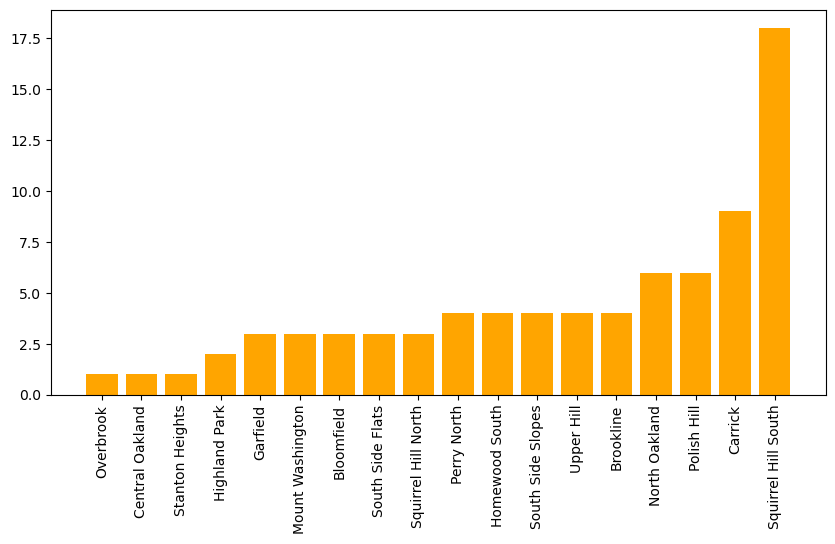

In [211]:
plt.figure(figsize=(10, 5))
plt.bar(humps_count['neighborhood'], humps_count['count'], color='orange')
plt.xticks(rotation=90)
plt.show() 

##  Conclusion 


As we can see from the graph, the top 5 neighbhorhood with the lowest amount of speed humps are the following: 
1. Overbrook (1)
2. Central Oakland (1)
3. Stantion heights (1) 
4. Highland Park (2)
5. Garfield (3)